### Iris
A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.

This is one of the earliest datasets used in the literature on classification methods and widely used in statistics and machine learning.  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are not linearly separable from each other.

Predicted attribute: class of iris plantres.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from  sklearn import  datasets
from sklearn.datasets import load_iris


In [2]:
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target_names[iris.target]

df['id'] = range(1, len(df) + 1)  

column_order = ['id', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Species']
df = df[column_order]


In [3]:
df.head()

id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0   1                5.1               3.5                1.4   
1   2                4.9               3.0                1.4   
2   3                4.7               3.2                1.3   
3   4                4.6               3.1                1.5   
4   5                5.0               3.6                1.4   

   petal width (cm) Species  
0               0.2  setosa  
1               0.2  setosa  
2               0.2  setosa  
3               0.2  setosa  
4               0.2  setosa

In [4]:
df.shape


(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 150 non-null    int64  
 1   sepal length (cm)  150 non-null    float64
 2   sepal width (cm)   150 non-null    float64
 3   petal length (cm)  150 non-null    float64
 4   petal width (cm)   150 non-null    float64
 5   Species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()


id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
count  150.000000         150.000000        150.000000         150.000000   
mean    75.500000           5.843333          3.057333           3.758000   
std     43.445368           0.828066          0.435866           1.765298   
min      1.000000           4.300000          2.000000           1.000000   
25%     38.250000           5.100000          2.800000           1.600000   
50%     75.500000           5.800000          3.000000           4.350000   
75%    112.750000           6.400000          3.300000           5.100000   
max    150.000000           7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

In [7]:
df.isnull().sum()

id                   0
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [8]:
data = df.drop_duplicates(subset ="Species",)
data

id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0      1                5.1               3.5                1.4   
50    51                7.0               3.2                4.7   
100  101                6.3               3.3                6.0   

     petal width (cm)     Species  
0                 0.2      setosa  
50                1.4  versicolor  
100               2.5   virginica

In [9]:
df.value_counts("Species")

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

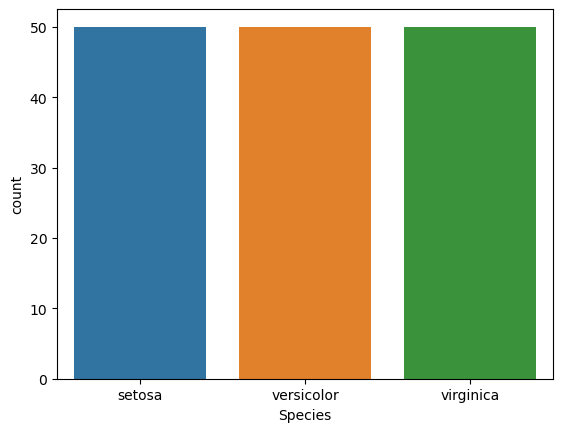

In [10]:
sns.countplot(x='Species', data=df, )
plt.show()

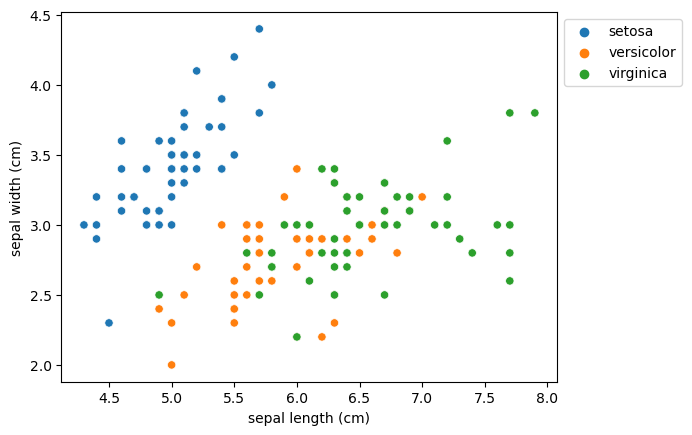

In [11]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)',
                hue='Species', data=df, )
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

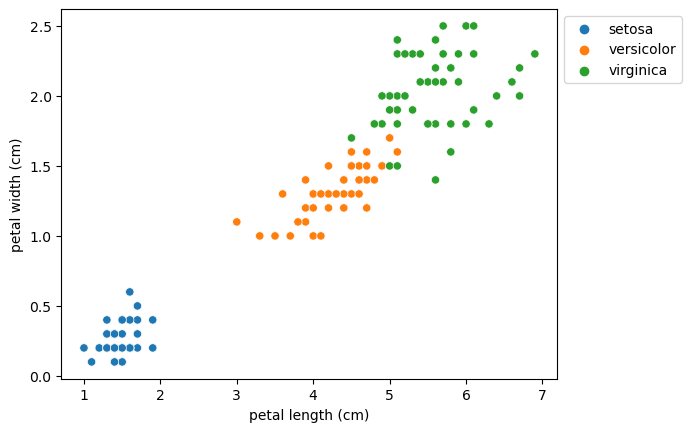

In [12]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)',
                hue='Species', data=df, )
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

C:\Users\Nitro5\anaconda3\envs\ml_mcm\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


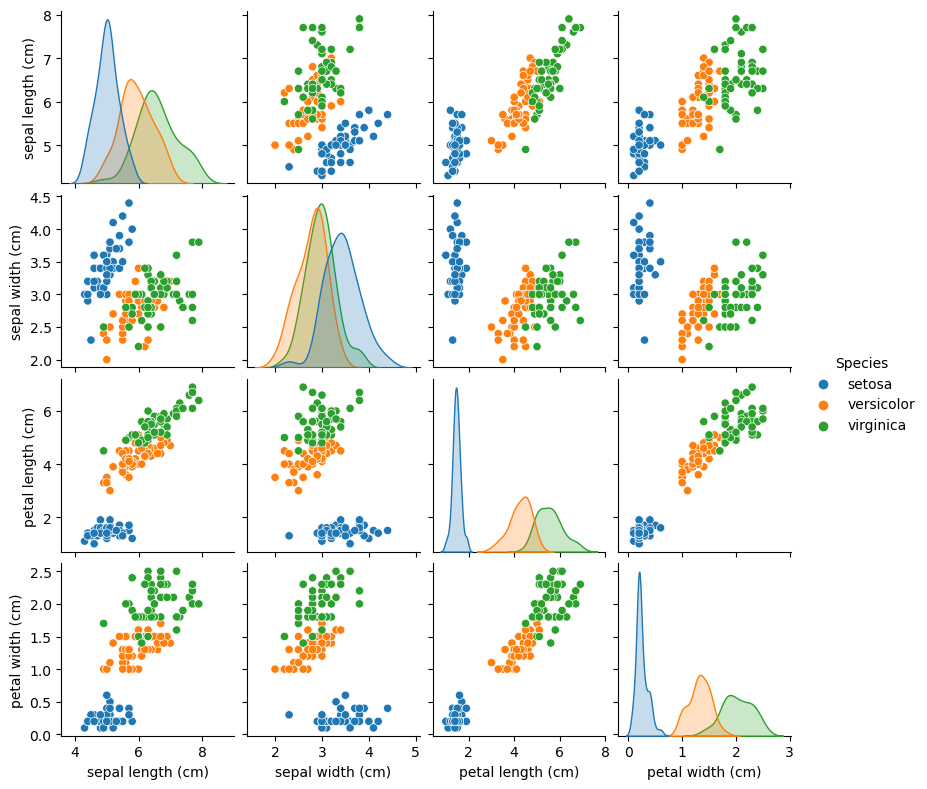

In [13]:
sns.pairplot(df.drop(['id'], axis = 1), 
             hue='Species', height=2)

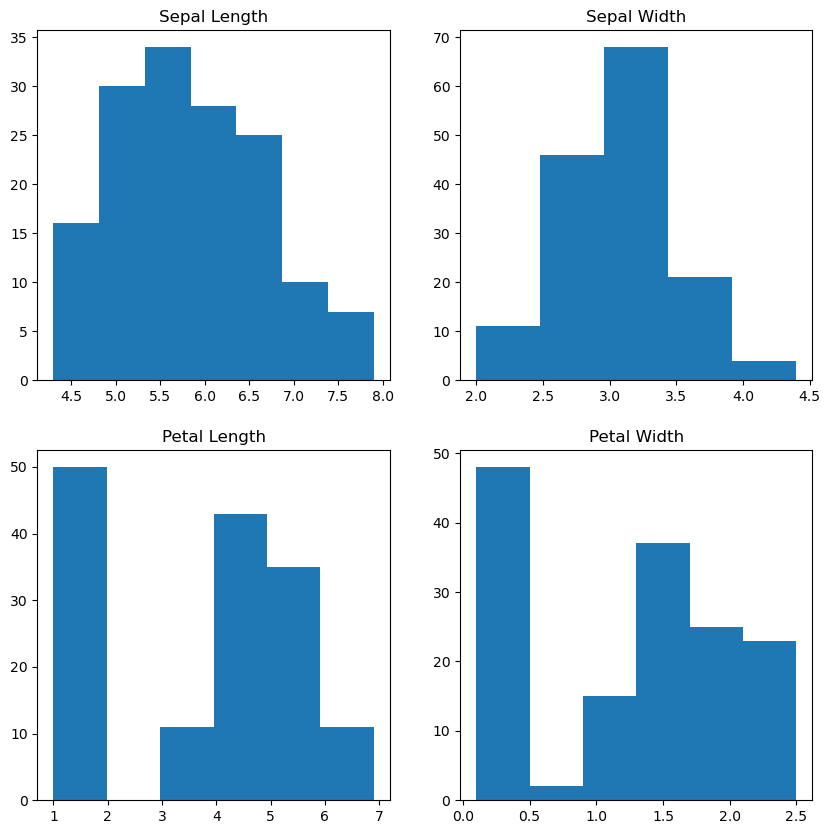

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
 
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['sepal length (cm)'], bins=7)
 
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['sepal width (cm)'], bins=5);
 
axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['petal length (cm)'], bins=6);
 
axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['petal width (cm)'], bins=6);

C:\Users\Nitro5\anaconda3\envs\ml_mcm\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Nitro5\anaconda3\envs\ml_mcm\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Nitro5\anaconda3\envs\ml_mcm\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Nitro5\anaconda3\envs\ml_mcm\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


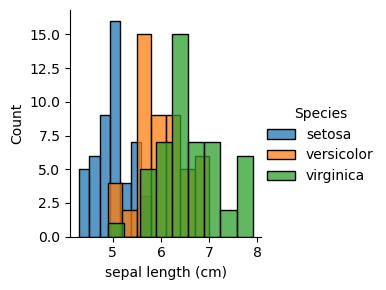

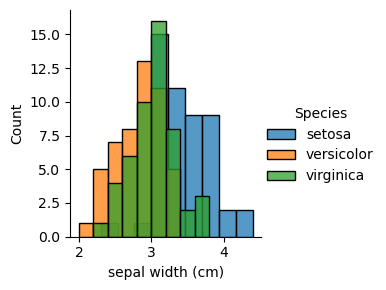

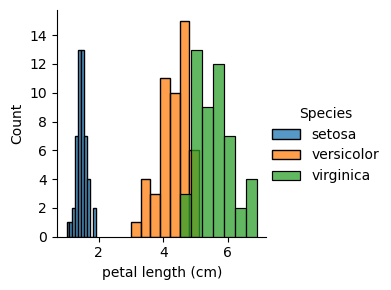

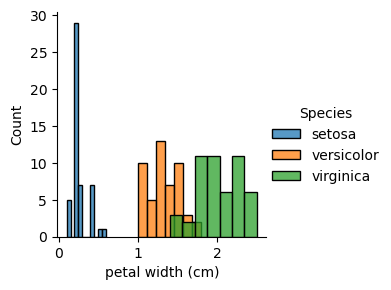

In [15]:
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "sepal length (cm)").add_legend()
 
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "sepal width (cm)").add_legend()
 
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "petal length (cm)").add_legend()
 
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "petal width (cm)").add_legend()
 
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

column_order = ['id', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Species']
data = data[column_order]

data['Species'] = label_encoder.fit_transform(data['Species'])

In [17]:
data.corr(method='pearson')

id  sepal length (cm)  sepal width (cm)  \
id                 1.000000           0.624413         -0.654654   
sepal length (cm)  0.624413           1.000000         -0.999226   
sepal width (cm)  -0.654654          -0.999226          1.000000   
petal length (cm)  0.969909           0.795795         -0.818999   
petal width (cm)   0.999685           0.643817         -0.673417   
Species            1.000000           0.624413         -0.654654   

                   petal length (cm)  petal width (cm)   Species  
id                          0.969909          0.999685  1.000000  
sepal length (cm)           0.795795          0.643817  0.624413  
sepal width (cm)           -0.818999         -0.673417 -0.654654  
petal length (cm)           1.000000          0.975713  0.969909  
petal width (cm)            0.975713          1.000000  0.999685  
Species                     0.969909          0.999685  1.000000

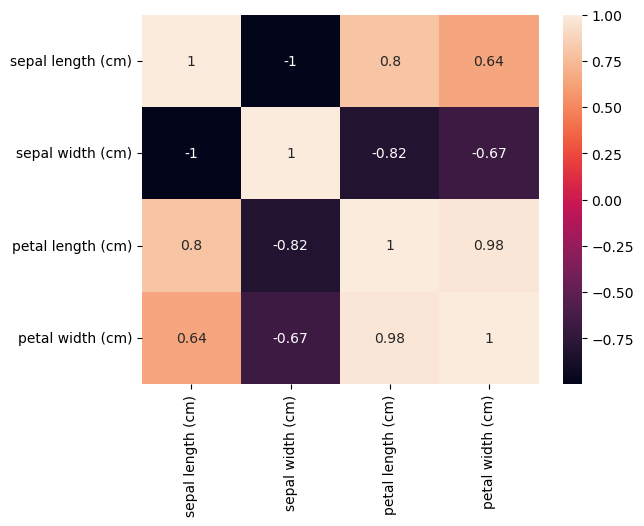

In [18]:
column_order = ['id', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data = data[column_order]
sns.heatmap(data.corr(method='pearson').drop(
  ['id'], axis=1).drop(['id'], axis=0),
            annot = True);
 
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

In [20]:
X = iris.data  
y = iris.target  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)


### SVM

In [21]:
model_svm = svm.SVC() 
model_svm.fit(X_train,y_train) 
prediction_svm=model_svm.predict(X_test)

print(accuracy_score(prediction_svm, y_test))

print(classification_report(y_test, prediction_svm))

print(confusion_matrix(y_test, prediction_svm))

0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  0]
 [ 0 12  0]
 [ 0  1 15]]


In [22]:
model_svm_cv = svm.SVC()

cv_scores_svm = cross_val_score(model_svm_cv, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores_svm)
print("Mean CV Accuracy:", cv_scores_svm.mean())

Cross-Validation Scores: [0.95238095 0.9047619  1.         0.80952381 1.        ]
Mean CV Accuracy: 0.9333333333333333


In [24]:
model_svm1 = svm.SVC() 

grid_search1 = GridSearchCV(model_svm1, param_grid_svm, cv=5)
grid_search1.fit(X_train, y_train)

best_model_svm1 = grid_search1.best_estimator_

prediction_svm1 = best_model_svm1.predict(X_test)

print(accuracy_score(prediction_svm1, y_test))

print(classification_report(y_test, prediction_svm1))

print(confusion_matrix(y_test, prediction_svm1))

0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  0]
 [ 0 12  0]
 [ 0  1 15]]


### Decision Tree

In [25]:
model_dt=DecisionTreeClassifier(max_depth=3)
model_dt.fit(X_train,y_train) 
prediction_dt=model_dt.predict(X_test)

print(accuracy_score(prediction_dt, y_test))

print(classification_report(y_test, prediction_dt))

print(confusion_matrix(y_test, prediction_dt))

0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.86      1.00      0.92        12
           2       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

[[17  0  0]
 [ 0 12  0]
 [ 0  2 14]]


In [26]:
model_dt_cv = DecisionTreeClassifier(max_depth=3)

cv_scores_dt = cross_val_score(model_dt_cv, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores_dt)
print("Mean CV Accuracy:", cv_scores_dt.mean())

Cross-Validation Scores: [0.9047619  0.95238095 1.         0.80952381 0.95238095]
Mean CV Accuracy: 0.9238095238095239


In [27]:
model_dt1 = DecisionTreeClassifier(random_state=42)


grid_search_dt = GridSearchCV(model_dt1, param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

best_model_dt = grid_search_dt.best_estimator_

prediction_dt1 = best_model_dt.predict(X_test)

print(accuracy_score(prediction_dt1, y_test))

print(classification_report(y_test, prediction_dt1))

print(confusion_matrix(y_test, prediction_dt1))

0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.80      1.00      0.89        12
           2       1.00      0.81      0.90        16

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45

[[17  0  0]
 [ 0 12  0]
 [ 0  3 13]]


### KNN

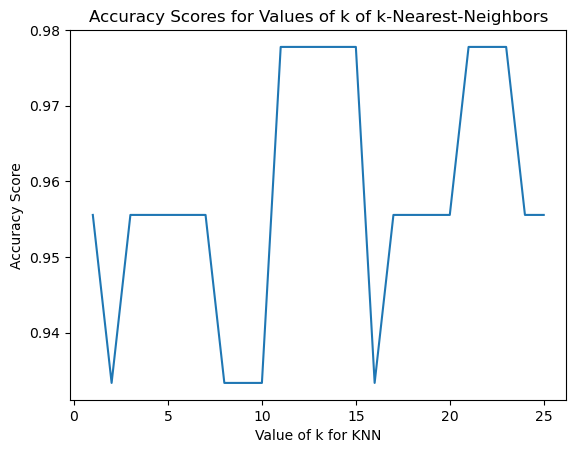

In [28]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    prediction_knn = model_knn.predict(X_test)
    scores.append(accuracy_score(y_test, prediction_knn))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [29]:
model_knn=KNeighborsClassifier(n_neighbors=13) 
model_knn.fit(X_train, y_train)
prediction_knn=model_knn.predict(X_test)

print(accuracy_score(prediction_knn,y_test))

print(classification_report(y_test, prediction_knn))

print(confusion_matrix(y_test, prediction_knn))

0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  0]
 [ 0 12  0]
 [ 0  1 15]]


In [30]:
model_knn_cv = KNeighborsClassifier(n_neighbors=13) 

cv_scores_knn = cross_val_score(model_knn_cv, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores_knn)
print("Mean CV Accuracy:", cv_scores_knn.mean())

Cross-Validation Scores: [1.         0.9047619  1.         0.80952381 0.95238095]
Mean CV Accuracy: 0.9333333333333333


In [31]:
model_knn1 = KNeighborsClassifier()


grid_search_knn = GridSearchCV(model_knn1, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

best_model_knn = grid_search_knn.best_estimator_

prediction_knn = best_model_knn.predict(X_test)

print(accuracy_score(prediction_knn, y_test))

print(classification_report(y_test, prediction_knn))

print(confusion_matrix(y_test, prediction_knn))

0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.86      1.00      0.92        12
           2       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

[[17  0  0]
 [ 0 12  0]
 [ 0  2 14]]


In [32]:
# h = .02 


# knn=KNeighborsClassifier() 
# knn.fit(X_train, y_train)

# # point in the mesh [x_min, m_max]x[y_min, y_max].
# x_min, x_max = X_train[:,0].min() - .5, X_train[:,0].max() + .5
# y_min, y_max = X_train[:,1].min() - .5, X_train[:,1].max() + .5
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Z = Z.reshape(xx.shape)
# plt.figure(1, figsize=(4, 3))
# plt.set_cmap(plt.cm.Paired)
# plt.pcolormesh(xx, yy, Z)

# plt.scatter(X[:,0], X[:,1],c=Y )
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())

# plt.show()

### Logistic Reg

In [32]:
model_lr = LogisticRegression(max_iter=1000)  
model_lr.fit(X_train, y_train)
prediction_lr = model_lr.predict(X_test)

print(accuracy_score(prediction_lr, y_test))

print(classification_report(y_test, prediction_lr))

print(confusion_matrix(y_test, prediction_lr))

0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.86      1.00      0.92        12
           2       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

[[17  0  0]
 [ 0 12  0]
 [ 0  2 14]]


In [34]:
model_knn_lr = LogisticRegression(max_iter=1000)  

cv_scores_lr = cross_val_score(model_knn_lr, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores_lr)
print("Mean CV Accuracy:", cv_scores_lr.mean())

Cross-Validation Scores: [0.9047619  0.9047619  1.         0.85714286 1.        ]
Mean CV Accuracy: 0.9333333333333332


In [35]:
model_lr1 = LogisticRegression(max_iter=1000)

grid_search_lr = GridSearchCV(model_lr1, param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)

best_model_lr = grid_search_lr.best_estimator_

prediction_lr = best_model_lr.predict(X_test)

print(accuracy_score(prediction_lr, y_test))

print(classification_report(y_test, prediction_lr))

print(confusion_matrix(y_test, prediction_lr))


0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  0]
 [ 0 12  0]
 [ 0  1 15]]


C:\Users\Nitro5\anaconda3\envs\ml_mcm\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nitro5\anaconda3\envs\ml_mcm\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nitro5\anaconda3\envs\ml_mcm\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Nitro5\anaconda3\envs\ml_mcm\lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver =

### We used all the features of iris in above models. Now we will use Petals and Sepals Seperately


In [36]:
petal = pd.DataFrame(data=iris.data[:, 2:4], columns=['petal length (cm)', 'petal width (cm)'])
petal['Species'] = iris.target_names[iris.target]

sepal = pd.DataFrame(data=iris.data[:, :2], columns=['sepal length (cm)', 'sepal width (cm)'])
sepal['Species'] = iris.target_names[iris.target]

print("Petal DataFrame:")
print(petal.head())

print("\nSepal DataFrame:")
print(sepal.head())

Petal DataFrame:
   petal length (cm)  petal width (cm) Species
0                1.4               0.2  setosa
1                1.4               0.2  setosa
2                1.3               0.2  setosa
3                1.5               0.2  setosa
4                1.4               0.2  setosa

Sepal DataFrame:
   sepal length (cm)  sepal width (cm) Species
0                5.1               3.5  setosa
1                4.9               3.0  setosa
2                4.7               3.2  setosa
3                4.6               3.1  setosa
4                5.0               3.6  setosa


In [37]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['petal width (cm)','petal length (cm)']]
train_y_p=train_p.Species
test_x_p=test_p[['petal width (cm)','petal length (cm)']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['sepal width (cm)','sepal length (cm)']]
train_y_s=train_s.Species
test_x_s=test_s[['sepal width (cm)','sepal length (cm)']]
test_y_s=test_s.Species

### SVM

In [39]:
model_svm_p=svm.SVC()
model_svm_p.fit(train_x_p,train_y_p) 
prediction_svm_p=model_svm_p.predict(test_x_p) 

print('Petals',accuracy_score(prediction_svm_p,test_y_p))

print(classification_report(test_y_s, prediction_svm_p))

print(confusion_matrix(test_y_s, prediction_svm_p))


model_svm_s=svm.SVC()
model_svm_s.fit(train_x_s,train_y_s) 
prediction_svm_s=model_svm_s.predict(test_x_s) 

print('Sepal',accuracy_score(prediction_svm_s,test_y_s))

print(classification_report(test_y_s, prediction_svm_s))

print(confusion_matrix(test_y_s, prediction_svm_s))

Petals 0.9777777777777777
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Sepal 0.8
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.76      0.72      0.74        18
   virginica       0.58      0.64      0.61        11

    accuracy                           0.80        45
   macro avg       0.78      0.79      0.78        45
weighted avg       0.80      0.80      0.80        45

[[16  0  0]
 [ 0 13  5]
 [ 0  4  7]]


In [44]:
model_svm_p_cv = svm.SVC()

cv_scores_svm_p = cross_val_score(model_svm_p_cv, train_x_p, train_y_p, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores_svm_p)
print("Mean CV Accuracy:", cv_scores_svm_p.mean())

Cross-Validation Scores: [0.9047619  1.         1.         0.9047619  0.95238095]
Mean CV Accuracy: 0.9523809523809523


### Logistic Reg

In [40]:
model_lr_p = LogisticRegression()
model_lr_p.fit(train_x_p,train_y_p) 
prediction_lr_p=model_lr_p.predict(test_x_p) 

print('Petals',metrics.accuracy_score(prediction_lr_p,test_y_p))

print(classification_report(test_y_s, prediction_lr_p))

print(confusion_matrix(test_y_s, prediction_lr_p))

model_lr_s = LogisticRegression()
model_lr_s.fit(train_x_s,train_y_s) 
prediction_lr_s=model_lr_s.predict(test_x_s) 

print('Sepals',metrics.accuracy_score(prediction_lr_s,test_y_s))

print(classification_report(test_y_s, prediction_lr_s))

print(confusion_matrix(test_y_s, prediction_lr_s))

Petals 0.9777777777777777
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Sepals 0.8222222222222222
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.81      0.72      0.76        18
   virginica       0.62      0.73      0.67        11

    accuracy                           0.82        45
   macro avg       0.81      0.82      0.81        45
weighted avg       0.83      0.82      0.82        45

[[16  0  0]
 [ 0 13  5]
 [ 0  3  8]]


In [43]:
model_lr_p_cv = LogisticRegression()

cv_scores_lr_p = cross_val_score(model_lr_p_cv, train_x_p, train_y_p, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores_lr_p)
print("Mean CV Accuracy:", cv_scores_lr_p.mean())

Cross-Validation Scores: [0.9047619  1.         1.         0.95238095 0.95238095]
Mean CV Accuracy: 0.9619047619047618


### Decision Tree

In [41]:
model_dt_p=DecisionTreeClassifier()
model_dt_p.fit(train_x_p,train_y_p) 
prediction_dt_p=model_dt_p.predict(test_x_p) 

print('Petals',accuracy_score(prediction_dt_p,test_y_p))

print(classification_report(test_y_s, prediction_dt_p))

print(confusion_matrix(test_y_s, prediction_dt_p))

model_dt_s=DecisionTreeClassifier()
model_dt_s.fit(train_x_s,train_y_s) 
prediction_dt_s=model_dt_s.predict(test_x_s) 

print('Sepals',accuracy_score(prediction_dt_s,test_y_s))

print(classification_report(test_y_s, prediction_dt_s))

print(confusion_matrix(test_y_s, prediction_dt_s))

Petals 0.9555555555555556
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      0.94      0.94        18
   virginica       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

[[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]
Sepals 0.6444444444444445
              precision    recall  f1-score   support

      setosa       0.94      1.00      0.97        16
  versicolor       0.55      0.61      0.58        18
   virginica       0.25      0.18      0.21        11

    accuracy                           0.64        45
   macro avg       0.58      0.60      0.59        45
weighted avg       0.62      0.64      0.63        45

[[16  0  0]
 [ 1 11  6]
 [ 0  9  2]]


In [45]:
model_dt_p_cv = DecisionTreeClassifier()

cv_scores_dt_p = cross_val_score(model_dt_p_cv, train_x_p, train_y_p, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores_dt_p)
print("Mean CV Accuracy:", cv_scores_dt_p.mean())

Cross-Validation Scores: [0.80952381 1.         1.         0.9047619  0.95238095]
Mean CV Accuracy: 0.9333333333333332


### KNN

In [48]:
model_knn_p=KNeighborsClassifier(n_neighbors=3) 
model_knn_p.fit(train_x_p,train_y_p) 
prediction_knn_p=model_knn_p.predict(test_x_p) 

print('Petals',accuracy_score(prediction_knn_p,test_y_p))

print(classification_report(test_y_s, prediction_knn_p))

print(confusion_matrix(test_y_s, prediction_knn_p))

model_knn_s=KNeighborsClassifier(n_neighbors=3) 
model_knn_s.fit(train_x_s,train_y_s) 
prediction_knn_s=model_knn_s.predict(test_x_s) 

print('Sepals',accuracy_score(prediction_knn_s,test_y_s))

print(classification_report(test_y_s, prediction_knn_s))

print(confusion_matrix(test_y_s, prediction_knn_s))

Petals 0.9777777777777777
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Sepals 0.7333333333333333
              precision    recall  f1-score   support

      setosa       0.94      1.00      0.97        16
  versicolor       0.75      0.50      0.60        18
   virginica       0.50      0.73      0.59        11

    accuracy                           0.73        45
   macro avg       0.73      0.74      0.72        45
weighted avg       0.76      0.73      0.73        45

[[16  0  0]
 [ 1  9  8]
 [ 0  3  8]]


In [46]:
model_knn_p_cv = KNeighborsClassifier(n_neighbors=3) 

cv_scores_knn_p = cross_val_score(model_knn_p_cv, train_x_p, train_y_p, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores_knn_p)
print("Mean CV Accuracy:", cv_scores_knn_p.mean())

Cross-Validation Scores: [0.85714286 0.95238095 1.         0.85714286 0.95238095]
Mean CV Accuracy: 0.9238095238095237


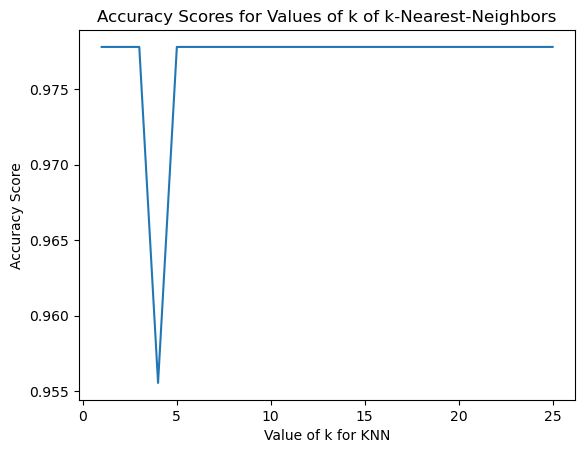

In [56]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn_p = KNeighborsClassifier(n_neighbors=k)
    model_knn_p.fit(train_x_p, train_y_p)
    prediction_knn_p = model_knn_p.predict(test_x_p)
    scores.append(accuracy_score(test_y_p, prediction_knn_p))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

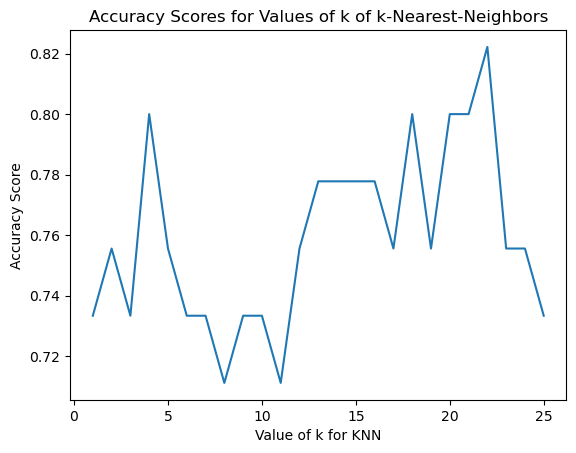

In [57]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn_p = KNeighborsClassifier(n_neighbors=k)
    model_knn_p.fit(train_x_s, train_y_s)
    prediction_knn_p = model_knn_p.predict(test_x_s)
    scores.append(accuracy_score(test_y_s, prediction_knn_p))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

Использование petals, а не sepals для обучения данных дает гораздо более высокую точностьь, так как на тепловой карте выше мы увидели, что корреляция между шириной и длиной чашелистика была очень низкой, в то время как корреляция между шириной и длиной лепестка была очень высокой.